In [1]:
%load_ext rpy2.ipython

# 3.1: One predictor

## A note on R packages

If the *arm*
library is not installed in your R setup, you'll need to figure out how to
install the package.  On Ubuntu 14.04 I do something like this:

* Start R using sudo:

sudo R

* Install the *arm* package using

install.packages('arm', dep = TRUE)

## Read the data

Data are in the *child.iq* directory of the ARM_Data download-- you might have
to change the path I use below to reflect the path on your computer.

In [2]:
%%R
# I had to import foreign to get access to read.dta
library("foreign")
kidiq <- read.dta("../../ARM_Data/child.iq/kidiq.dta")

# I won't attach kidiq-- i generally don't attach to avoid confusion(s)
#attach(kidiq)

## First regression-- binary predictor, Pg 31

Loading the *arm* library -- this produces lots of warnings on the first load
that I can't figure out how suppress at this point.  However, things work just
fine despite the distraction of the warnings. Just rerun the cell to clean up
the mess. Also, **let me know if you can figure out how get rid of the
warnings.**

In [10]:
%%R
library("arm")

Fit the regression using the non-jittered data

In [4]:
%%R
fit0 <- lm(kidiq$kid_score ~ kidiq$mom_hs)
display(fit0)

lm(formula = kidiq$kid_score ~ kidiq$mom_hs)
             coef.est coef.se
(Intercept)  77.55     2.06  
kidiq$mom_hs 11.77     2.32  
---
n = 434, k = 2
residual sd = 19.85, R-Squared = 0.06


## Plot Figure 3.1, Pg 32

Add some jitter to *kid_score*

In [5]:
%%R
# -- note that I use kidiq$kid_score because I did not attach kidiq above
kidscore.jitter <- jitter(kidiq$kid_score)

Add some 'binary jitter' to  *mom_hs*

In [6]:
%%R
# define function
jitter.binary <- function(a, jitt=.05){
   ifelse (a==0, runif (length(a), 0, jitt), runif (length(a), 1-jitt, 1))
}

# use a slightly different name
mom_hs.jitter <- jitter.binary(kidiq$mom_hs)

Plot using the jittered data

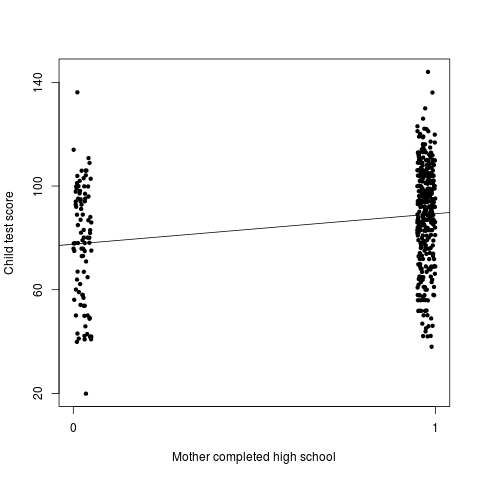

In [7]:
%%R
plot(mom_hs.jitter, kidscore.jitter,
     xlab="Mother completed high school", 
     ylab="Child test score",
     pch=20, xaxt="n", yaxt="n")
axis(1, seq(0,1))
axis(2, c(20,60,100,140))
abline(fit0)

## Second regression -- continuous predictor, Pg 32

In [8]:
%%R
fit1 <- lm (kidiq$kid_score ~ kidiq$mom_iq)
display(fit1)

lm(formula = kidiq$kid_score ~ kidiq$mom_iq)
             coef.est coef.se
(Intercept)  25.80     5.92  
kidiq$mom_iq  0.61     0.06  
---
n = 434, k = 2
residual sd = 18.27, R-Squared = 0.20


## Figure 3.2, Pg 33

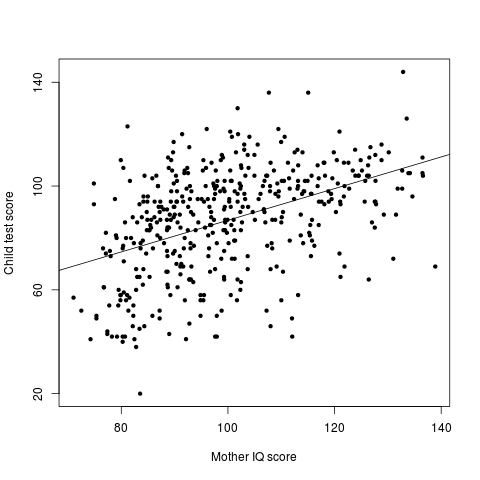

In [9]:
%%R
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", 
     ylab="Child test score",
     pch=20, xaxt="n", yaxt="n")
axis(1, c(80,100,120,140))
axis(2, c(20,60,100,140))
abline (fit1)